In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
# peer-nomination data
nom_data = '../data/W5_Sociometric_long.csv'
df_nom = pd.read_csv(nom_data, sep=';', header=0)

# online communication data
primary_school = '../data/Buzz_W5_primary-schools.csv'
secondary_school = '../data/Buzz_W5_secondary-schools.csv'

df_com = pd.read_csv(primary_school, sep=';', header=0, encoding='latin-1')
df_com = df_com.append(pd.read_csv(secondary_school, sep=';', header=0, encoding='latin-1'))
df_com = df_com[df_com.Type=='my'] # only select text messages

df_com.head()


/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3257: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Participant,School,Class,Child,Gender,Age,PI,Date,Time,UMID,...,ShareSource,SharedVia,Number_likes,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,3410302337,34.0,103.0,2337.0,0.0,11.0,7.0,9-3-2018,12:23,102371,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,3410302337,34.0,103.0,2337.0,0.0,11.0,7.0,10-3-2018,14:50,107068,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,3410302337,34.0,103.0,2337.0,0.0,11.0,7.0,10-3-2018,14:50,107069,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,3410302341,34.0,103.0,2341.0,1.0,12.0,0.0,9-3-2018,10:00,101555,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,3410302341,34.0,103.0,2341.0,1.0,12.0,0.0,9-3-2018,12:26,102431,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# select participants found in both datasets

participants_nom = df_nom['Child'].unique()
participants_com = df_com['Child'].unique()

lst_nom = []
lst_com = []
for int in participants_nom:
    if (participants_com.__contains__(int)):
        lst_nom.append(df_nom[df_nom['Child'] == int])
        lst_com.append(df_com[df_com['Child'] == int])

df_nom2 = pd.concat(lst_nom)
df_com2 = pd.concat(lst_com)

# Numbers of participants per class
df_com_child_class = df_com2.groupby('Class')['Child'].nunique().reset_index(name="NumChildren")
df_nom_child_class = df_nom2.groupby('Class')['Child'].nunique().reset_index(name="NumChildren")

,Class,NumChildren
0,73,1
1,74,1
2,78,18
3,81,19
4,82,8
5,86,5
6,100,19
7,103,11
8,124,17
9,125,16


In [5]:
# Select classes >15 participants
selected_classes = df_com_child_class[df_com_child_class['NumChildren'] > 14]['Class']
#df_nom_child_class[df_nom_child_class['NumChildren'] > 14]

df_nom3 = df_nom2[df_nom2.Class.isin(selected_classes)]
df_com3 = df_com2[df_com2.Class.isin(selected_classes)]

selection_participants = df_nom3['Child'].unique()

# to dictionary
data = { 'participants' : np.ndarray.tolist(selection_participants)}

# save as json in input folder
with open('../input/participants.json', 'w') as outfile:
    json.dump(data, outfile)


,School,Class,Child,Gender,Age,PI,Wave,Variable,Alter
233,29,81,1605,1,14,0,5,GEN_Advice,1606
234,29,81,1605,1,14,0,5,GEN_Advice,1616
235,29,81,1605,1,14,0,5,GEN_Advice,1617
236,29,81,1605,1,14,0,5,GEN_Advice,1628
237,29,81,1605,1,14,0,5,GEN_Leader,1606
...,...,...,...,...,...,...,...,...,...
16157,58,303,6090,0,11,0,5,PA_Com_Network,6068
16158,58,303,6090,0,11,0,5,PA_Com_Network,6075
16159,58,303,6090,0,11,0,5,PA_Com_Network,6077
16160,58,303,6090,0,11,0,5,PA_Com_Network,6084


In [9]:
df_com3.groupby('Class')['Child'].nunique().reset_index(name="NumChildren").sum()
df_nom3.groupby('Class')['Child'].nunique().reset_index(name="NumChildren").sum()


Class          5041
NumChildren     408
dtype: int64

In [21]:
df_com_child_class

,Class,NumChildren
0,73.0,1
1,74.0,1
2,78.0,18
3,81.0,19
4,82.0,8
5,86.0,5
6,100.0,19
7,103.0,11
8,124.0,17
9,125.0,16


Text(0.5, 1.0, 'Histogram')

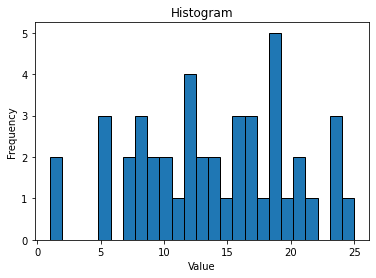

In [19]:
plt.hist(df_com_child_class['NumChildren'], bins=25, edgecolor='black')

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')